In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datapath = "/data/Misc"
filename = "20230327_181800_BroadSpectrumTrans.csv"
# filename = "20230327_183100_AlRes.csv"
line_atten_dB = 56.5

In [2]:
data = pd.read_csv(os.path.join(datapath,filename),header=2)
key_f, key_lm, key_deg = data.keys()
data["phi"] = data[key_deg] * np.pi/180.
data["mag"] = np.power(10,data[key_lm]/20.)
data["S21r"] = data["mag"]*np.cos(data["phi"])
data["S21i"] = data["mag"]*np.sin(data["phi"])
data

,! Stimulus(Hz),S21(dB),S21(°),phi,mag,S21r,S21i
0,3.900000e+09,-5.737084,128.446023,2.241806,0.516590,-0.321204,0.404590
1,3.900025e+09,-5.771580,127.699063,2.228769,0.514542,-0.314650,0.407123
2,3.900050e+09,-5.816181,127.072251,2.217829,0.511907,-0.308589,0.408438
3,3.900075e+09,-5.798275,126.567098,2.209013,0.512963,-0.305605,0.411991
4,3.900100e+09,-5.741302,125.739927,2.194576,0.516339,-0.301597,0.419100
...,...,...,...,...,...,...,...
19995,4.399900e+09,-6.857697,54.870057,0.957663,0.454062,0.261282,0.371354
19996,4.399925e+09,-6.976977,54.190821,0.945808,0.447869,0.262043,0.363209
19997,4.399950e+09,-7.028867,54.335682,0.948337,0.445202,0.259568,0.361703
19998,4.399975e+09,-7.095465,53.657042,0.936492,0.441801,0.261819,0.355864


(3.9, 4.4)

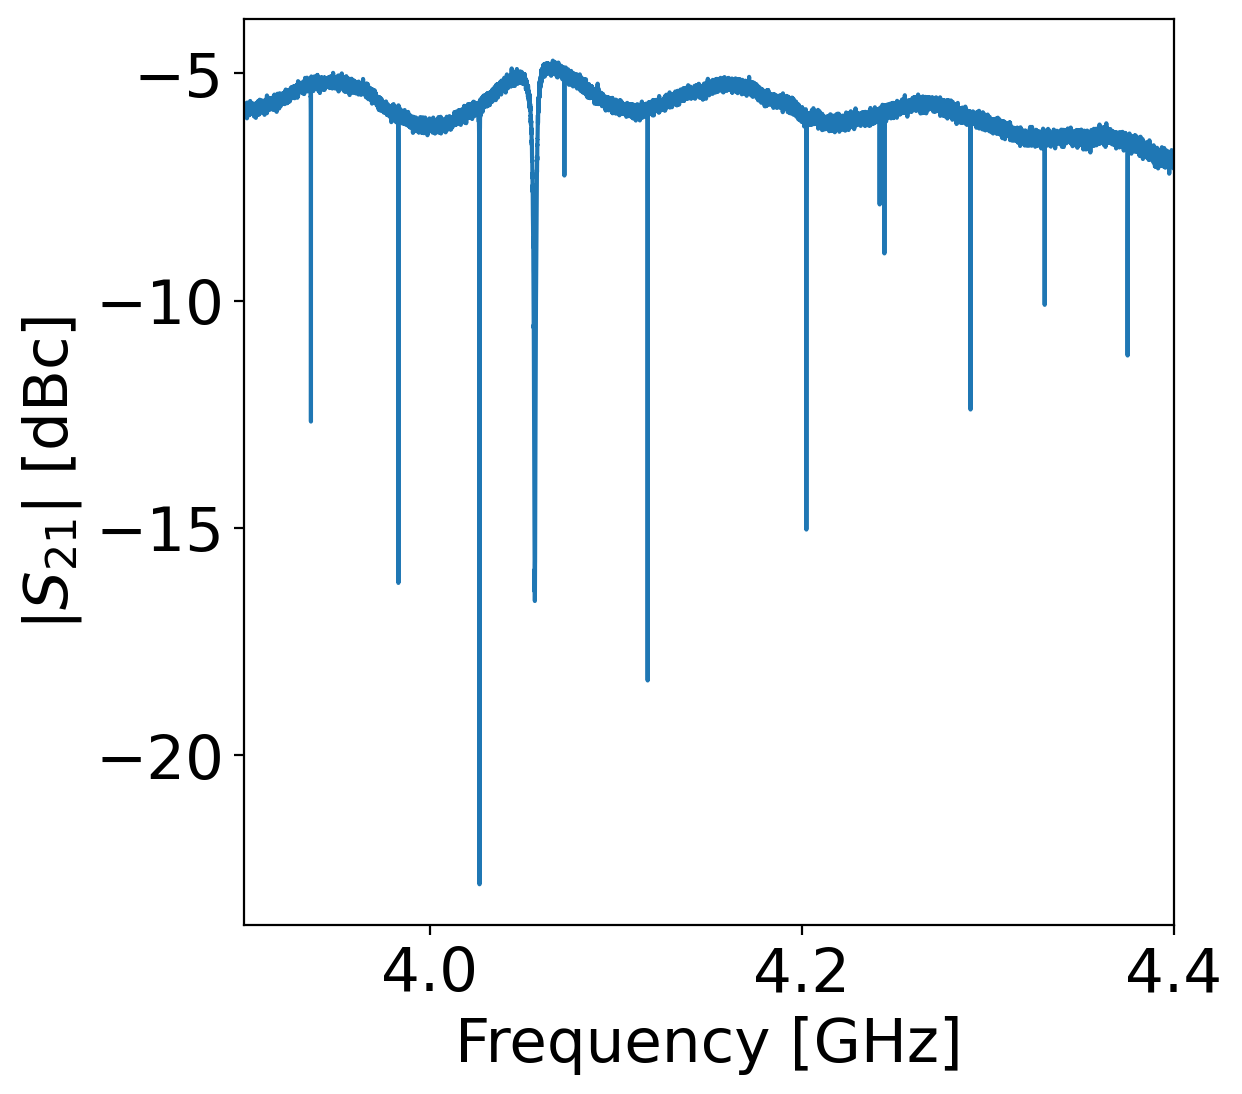

In [3]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6),dpi=200)
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$|S_{21}|$ [dBc]")
# ax0.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax0.plot(data[key_f]/1e9,data[key_lm])
ax0.set_xlim([np.min(data[key_f])/1e9,np.max(data[key_f])/1e9])

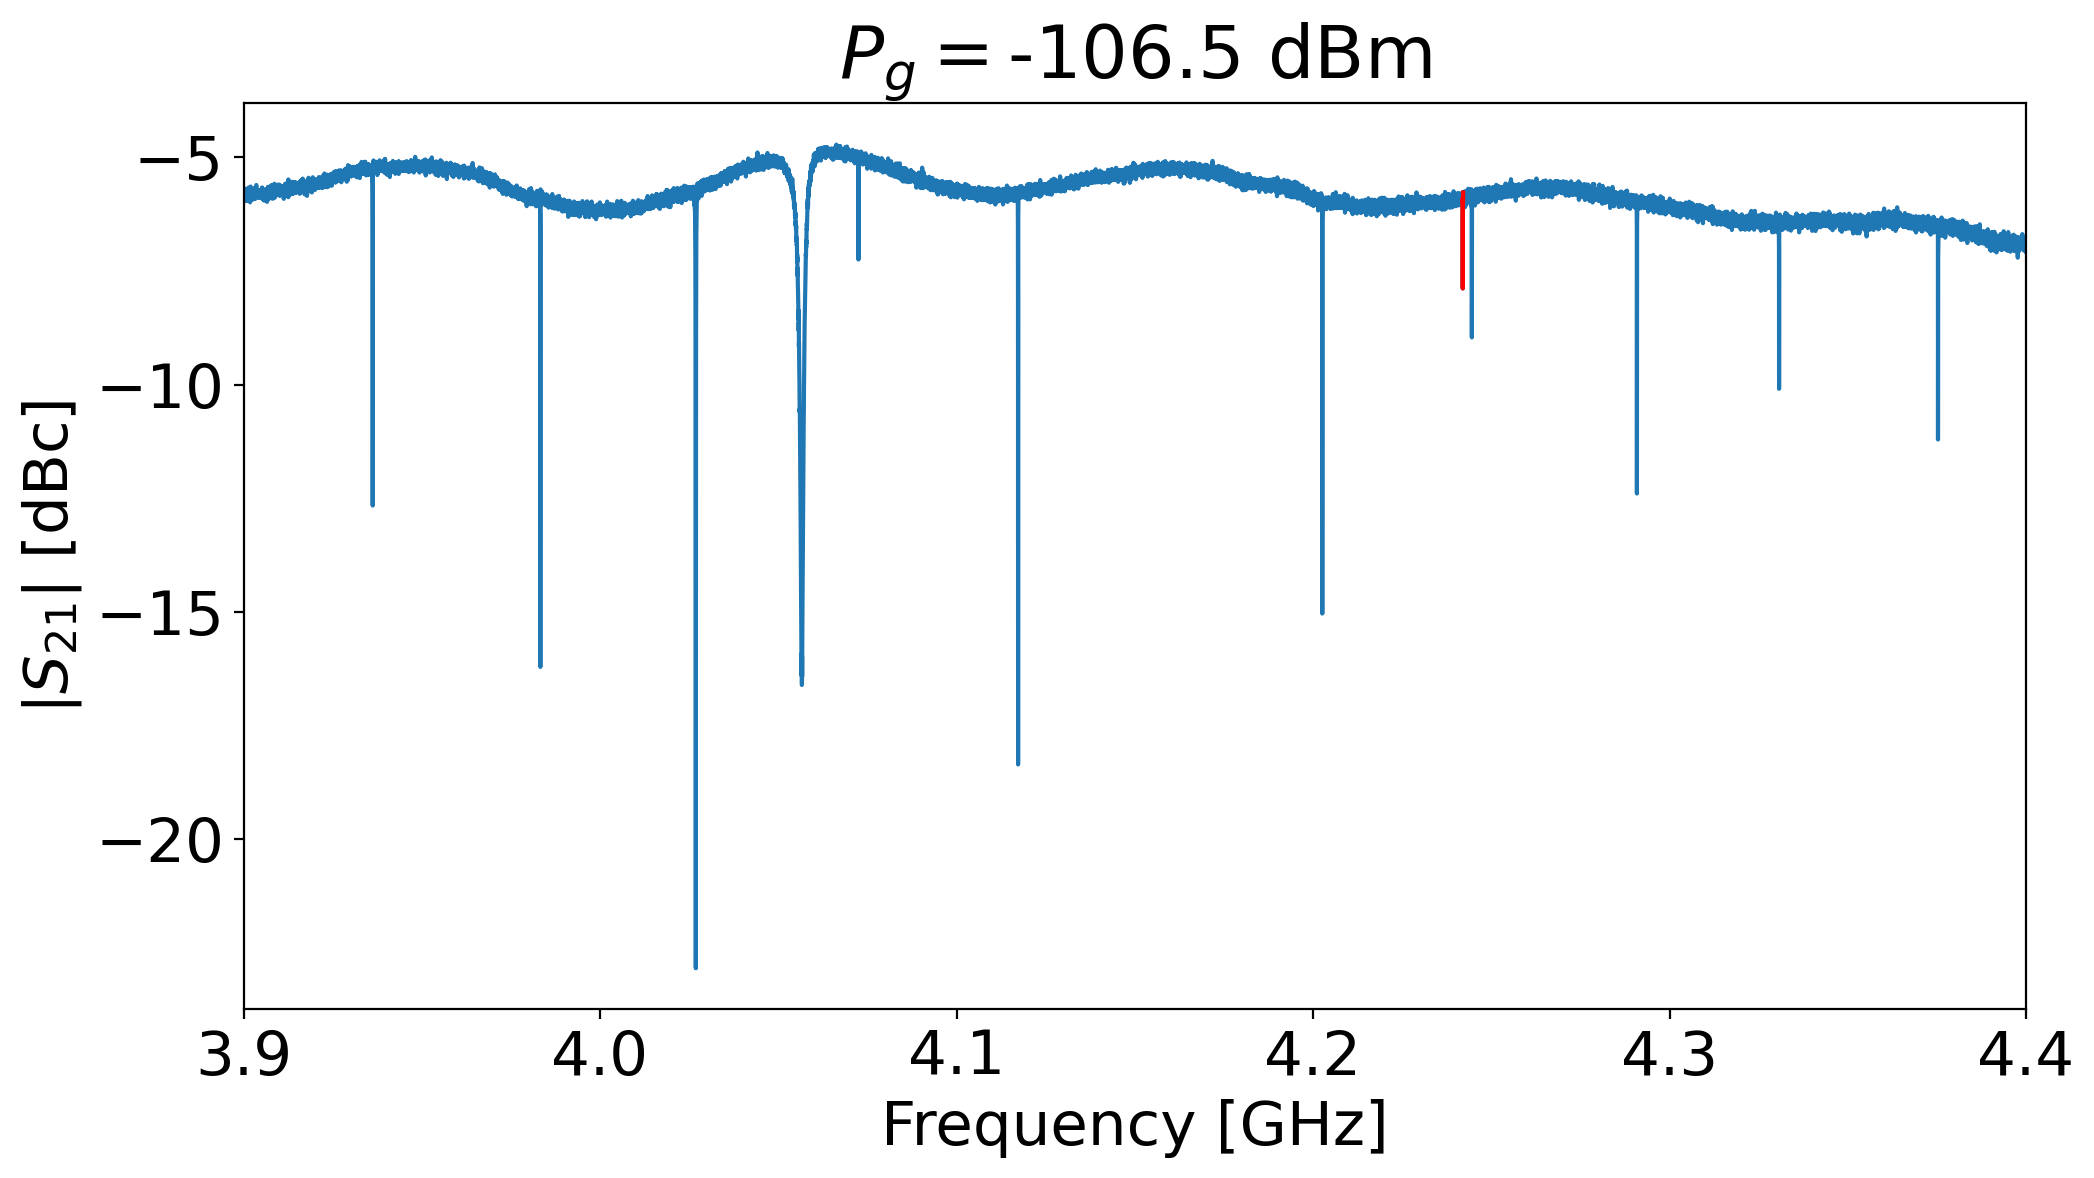

In [9]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(11.5,6),dpi=200)
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$|S_{21}|$ [dBc]")
ax0.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax0.plot(data[key_f]/1e9,data[key_lm])
ax0.set_xlim([np.min(data[key_f])/1e9,np.max(data[key_f])/1e9])


f = data[key_f]/1e9
S = data[key_lm]
S = S[(f>4.2419)&(f<4.2421)]
f = f[(f>4.2419)&(f<4.2421)]

ax0.plot(f,S,c='r')

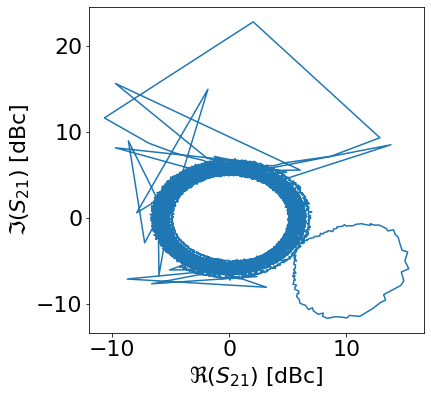

In [8]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel(r"$\Re(S_{21})$ [dBc]")
ax0.set_ylabel(r"$\Im(S_{21})$ [dBc]")
ax0.plot(data[key_lm]*np.cos(data["phi"]),data[key_lm]*np.sin(data["phi"]))

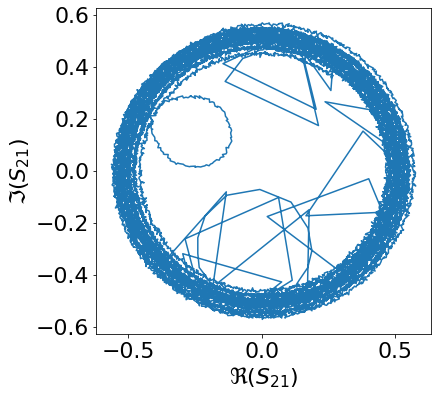

In [6]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(6,6))
# fig = plt.figure(figsize=(14,8))
ax0 = fig.gca()
ax0.set_xlabel(r"$\Re(S_{21})$")
ax0.set_ylabel(r"$\Im(S_{21})$")
ax0.plot(data["S21r"],data["S21i"])